# Keras Mnist
在这里，我们将利用Keras搭建一个深度学习网络对mnist数据集进行识别。
+ 本文参考 [keras-mnist-tutorial](https://github.com/wxs/keras-mnist-tutorial)
+ 整个代码分为三个部分：
    1. 数据准备
    2. 模型搭建
    3. 训练优化

## 让我们开始吧
首先先导入一些模块

In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

## 数据准备
我们通过keras自带的数据集mnist进行导入数据，然后对其归一化处理，并且将原二维数据变成一维数据，作为网络的输入。

读入mnist数据集。可以看到每条样本是一个28*28的矩阵，共有60000个训练数据，10000个测试数据。

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data();
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


将一些样本图像打印出来看看

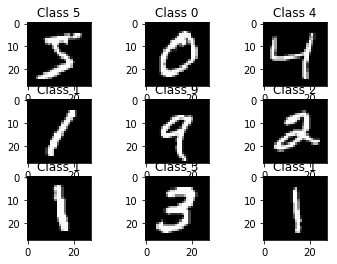

In [44]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

将二维数据变成一维数据

In [45]:
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

接下来对数据进行归一化。原来的数据范围是[0,255]，我们通过归一化时靠近0附近。归一化的方式有很多，大家随意。

In [49]:
# uint不能有负数，我们先转为float类型
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = (X_train - 127) / 127
X_test = (X_test - 127) / 127

接下来 One-hot encoding

In [51]:
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

## 搭建网络
数据已经准备好了，接下来我们进行网络的搭建，我们的网络有三层，都是全连接网络，大概长的像这样
![网络模型](https://raw.githubusercontent.com/wxs/keras-mnist-tutorial/8824b7b56963a92ef879f09acd99cf3a210db2b8/figure.png)

这里新遇到一个Dropout，这是一种防止过拟合(overfitting)的方法，详见[Dropout层](https://keras-cn.readthedocs.io/en/latest/layers/core_layer/)

In [71]:
model = Sequential()

model.add(Dense(512, input_shape=(784,), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2)) 

model.add(Dense(512, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2)) 

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

OK！模型搭建好了，我们通过编译对学习过程进行配置

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

那么我们进行训练吧

In [76]:
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1, validation_split=0.05)

Train on 57000 samples, validate on 3000 samples
Epoch 1/20
57000/57000 [==============================] - 19s 327us/step - loss: 0.0811 - acc: 0.9761 - val_loss: 0.0702 - val_acc: 0.9810
Epoch 2/20
57000/57000 [==============================] - 19s 328us/step - loss: 0.0752 - acc: 0.9772 - val_loss: 0.0720 - val_acc: 0.9813
Epoch 3/20
57000/57000 [==============================] - 19s 331us/step - loss: 0.0687 - acc: 0.9788 - val_loss: 0.0670 - val_acc: 0.9830
Epoch 4/20
57000/57000 [==============================] - 20s 350us/step - loss: 0.0667 - acc: 0.9794 - val_loss: 0.0755 - val_acc: 0.9810
Epoch 5/20
57000/57000 [==============================] - 20s 353us/step - loss: 0.0688 - acc: 0.9794 - val_loss: 0.0671 - val_acc: 0.9820
Epoch 6/20
57000/57000 [==============================] - 20s 346us/step - loss: 0.0639 - acc: 0.9807 - val_loss: 0.0744 - val_acc: 0.9790
Epoch 7/20
57000/57000 [==============================] - 20s 342us/step - loss: 0.0626 - acc: 0.9805 - val_loss: 0.0

训练完毕，测试测试

In [77]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', accuracy)

10000/10000 [==============================] - 1s 80us/step
Test loss: 0.0864374790877
Accuracy: 0.9817
